## TEXT CLASSIFICATION

### Prepare

In [1]:
# Import library python

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

2024-01-31 23:09:40.338296: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import requests
import random
import re

In [3]:
# Check GPU

tf.config.list_physical_devices('GPU')

[]

In [4]:
# Add helper function

url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
response = requests.get(url)
with open("helper_functions.py", "wb") as file:
    file.write(response.content)
print("'helper_functions.py'")

'helper_functions.py'


In [5]:
# Import series of helper functions for the notebook

from helper_functions import create_tensorboard_callback, plot_loss_curves, calculate_results

### Visualize data

In [6]:
df_data = pd.read_csv('Tweets.csv')
df_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#### encode

In [7]:
#Encoding Categorical to Numeric 

label_encode={"airline_sentiment": {"negative":0,"neutral" :1,"positive":2}}
df_data=df_data.replace(label_encode)

#### cleansing text

In [8]:
def cleansing(df_data):
    df_clean_shuffled = df_data.str.lower()
    df_clean_shuffled = [re.sub(r'[^\w\s]', '', i) for i in df_clean_shuffled]
    df_clean_shuffled = [re.sub(r'http\S+|www\S+|pic.twitter.com\S+|\S+.com\S+', '', i) for i in df_clean_shuffled]
    df_clean_shuffled = [re.sub(r'\s+', ' ', i) for i in df_clean_shuffled]
    return df_clean_shuffled

In [9]:
df_data['clean_text'] = cleansing(df_data['text'])
df_data.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,1,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica what dhepburn said
1,570301130888122368,2,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus youve to the experience tacky
2,570301083672813571,1,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica i didnt today must mean i need t...
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica its really aggressive to blast o...
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica and its a really big bad thing a...


#### shuffled

**<center>df.sample(frac=1, random_state=42)</center>**

<font size="3"> Fungsi sample digunakan untuk mengambil sampel acak dari DataFrame. Parameter frac=1 berarti kita mengambil   seluruh baris DataFrame (100% dari total baris). Dengan kata lain, ini adalah cara untuk mengacak DataFrame. Parameter random_state=42 digunakan untuk membuat hasil pengacakan menjadi dapat direproduksi. Dengan menggunakan nilai seed (42 dalam hal ini), hasil acak akan tetap sama setiap kali kita menjalankan code ini. </font>

<font size="3"> Secara keseluruhan, code ini digunakan untuk mengacak baris-baris dalam DataFrame df dengan tujuan untuk memastikan bahwa urutan data tidak mempengaruhi pembelajaran model. Mengacak data dapat membantu meningkatkan keberagaman data yang diberikan kepada model selama pelatihan. </font>

In [10]:
# Shuffle training dataframe
# shuffle with random_state=42 for reproducibility

df_shuffled = df_data.sample(frac=1, random_state=42) 
df_shuffled.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
4794,569731104070115329,2,1.0000,NaN,NaN,Southwest,NaN,JasmineDT,NaN,1,@SouthwestAir you're my early frontrunner for ...,NaN,2015-02-22 21:30:54 -0800,Washington D.C.,Eastern Time (US & Canada),southwestair youre my early frontrunner for be...
10480,569263373092823040,0,1.0000,Cancelled Flight,1.0000,US Airways,NaN,ElizabethFrayer,NaN,0,@USAirways how is it that my flt to EWR was Ca...,NaN,2015-02-21 14:32:19 -0800,NaN,NaN,usairways how is it that my flt to ewr was can...
8067,568818669024907264,0,1.0000,Late Flight,0.6770,Delta,NaN,The_Radifier,NaN,0,@JetBlue what is going on with your BDL to DCA...,NaN,2015-02-20 09:05:13 -0800,"Arlington, VA",Atlantic Time (Canada),jetblue what is going on with your bdl to dca ...
8880,567775864679456768,1,1.0000,NaN,NaN,Delta,NaN,rnlewisjr,NaN,0,@JetBlue do they have to depart from Washingto...,NaN,2015-02-17 12:01:29 -0800,"iPhone: 60.495510,-151.064590",Alaska,jetblue do they have to depart from washington dc
8292,568526521910079488,0,0.6625,Customer Service Issue,0.3394,Delta,NaN,beantoon,NaN,0,@JetBlue I can probably find some of them. Are...,NaN,2015-02-19 13:44:20 -0800,"Plymouth, MA",NaN,jetblue i can probably find some of them are t...


#### labels

<font size="3"> Memastikan hasil dari shuffled untuk airline_sentiment bahwa kolom sebelumnya adalah hasil dari encode menjadi angka </font>

In [11]:
# Check unique 'airline_sentiment'

unique_sentiments = df_data['airline_sentiment'].unique()
print(unique_sentiments)

[1 2 0]


In [12]:
df_shuffled[df_shuffled['tweet_id'] == 570306133677760513]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,1,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica what dhepburn said


In [13]:
df_shuffled[df_shuffled['tweet_id'] == 570301130888122368]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
1,570301130888122368,2,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus youve to the experience tacky


In [14]:
# examples of each class

df_data.airline_sentiment.value_counts()

airline_sentiment
0    9178
1    3099
2    2363
Name: count, dtype: int64

In [15]:
# samples total

print(f"Total samples: {len(df_data)}")

Total samples: 14640


In [16]:
# visualize some random training examples
# create random indexes not higher than the total number of samples

random_index = random.randint(0, len(df_data)-3) 
for row in df_shuffled[["clean_text", "airline_sentiment"]].iloc[random_index:random_index+3].itertuples():
    _, clean_text, airline_sentiment = row
    sentiment_label = "(negatif)" if airline_sentiment == 0 else "(neutral)" if airline_sentiment == 1 else "(positive)"
    
    print(f"Target: {airline_sentiment} {sentiment_label}")
    print(f"clean_text:\n{clean_text}\n")
    print("---\n")

Target: 2 (positive)
clean_text:
united is my favorite airline

---

Target: 0 (negatif)
clean_text:
southwestair why cant i find a cheap flight from dc to st louis the prices went up like crazy for april weekends

---

Target: 1 (neutral)
clean_text:
jetblue and when did your legal department start running your social media channels

---



### Split test

In [17]:
from sklearn.model_selection import train_test_split

# One Hot Encoding for the label

Since the label is ordinal, the embedding label should be separated into 3 different columns.

| sentiment_negative | sentiment_neutral | sentiment_positive |
|---|---|---|
| True | False | False |
| False | True | False |
| False | False | True |

For each row in the top table, ressemble value:

0, 1, 2.

In [18]:
hot_encoded_airline_sentiment = pd.get_dummies(df_shuffled['airline_sentiment'], prefix = "airline_sentiment");
hot_encoded_airline_sentiment.to_numpy()

array([[False, False,  True],
       [ True, False, False],
       [ True, False, False],
       ...,
       [ True, False, False],
       [ True, False, False],
       [False,  True, False]])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df_shuffled['clean_text'].to_numpy(),hot_encoded_airline_sentiment.to_numpy(),
    test_size=0.7,
    random_state=42
)

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42);

In [20]:
# Check the lengths

len(x_train), len(x_test), len(y_train), len(y_test)

(4392, 5124, 4392, 5124)

In [21]:
# View the first 10 training sentences and their labels

x_train[:10], y_train[:10]

(array(['americanair thanks to aa dart for getting me home in time for work this morning dendfw didnt have to waste a vaca day dartmedia',
        'united i appreciate you looking can me on anything for my troubles still havent taken off for a 1030 am flight',
        'united ok can i dm you the info',
        'united has once again let me down dont think ive ever flown with them and not had problems worst airline period',
        'usairways please dont trivialize me this is a joke not a slow day or slow experience',
        'united have clients with an 11 hr layover at iah during the day will they have to claim amp recheck luggage or will it be taken care of',
        'jetblue plan to repair its brand via wsj',
        'jetblue flight 1951 bags and we landed 30 minutes ago',
        'southwestair ohk thank you bc of the inexpensive airfares that southwest has i can now travel around',
        'united v upset with your disability services when i told one of your employees i was carryin

#### Text vectorization (tokenization)


In [22]:
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [23]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in x_train])/len(x_train))

17

In [24]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 50 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [25]:
# Fit the text vectorizer to the training text

text_vectorizer.adapt(x_train)

In [26]:
# Create sample sentence and tokenize it

sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 50), dtype=int64, numpy=
array([[ 448,    5,    1,   16,   12, 1106,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]])>

In [27]:
# Choose a random sentence from the training dataset and tokenize it

random_sentence = random.choice(x_train)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
united what a pointless tweet at least americanair asked me to follow them to try and resolve      

Vectorized version:


<tf.Tensor: shape=(1, 50), dtype=int64, numpy=
array([[   6,   59,    5, 2389,  540,   27,  499,   14,  411,   20,    2,
         345,  179,    2,  350,   11, 1274,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]])>

In [28]:
# Get the unique words in the vocabulary

words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 7502
Top 5 most common words: ['', '[UNK]', 'to', 'the', 'i']
Bottom 5 least common words: ['02272015', '0223', '022015', '0167560070877', '00']


#### Creating an Embedding using an Embedding Layer

In [29]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [30]:
# Get a random sentence from training set

random_sentence = random.choice(x_train)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
southwestair thanks will do      

Embedded version:


<tf.Tensor: shape=(1, 50, 128), dtype=float32, numpy=
array([[[ 0.00503918, -0.0144207 , -0.03183448, ...,  0.00124867,
         -0.02458286,  0.00366759],
        [ 0.00565103, -0.00860173, -0.01466235, ..., -0.00744594,
         -0.00779557, -0.02401043],
        [ 0.04112599, -0.03633161,  0.03817464, ..., -0.03268439,
         -0.04992108, -0.01074179],
        ...,
        [ 0.0031781 ,  0.00927167, -0.03981272, ..., -0.01261575,
         -0.02811912,  0.03469621],
        [ 0.0031781 ,  0.00927167, -0.03981272, ..., -0.01261575,
         -0.02811912,  0.03469621],
        [ 0.0031781 ,  0.00927167, -0.03981272, ..., -0.01261575,
         -0.02811912,  0.03469621]]], dtype=float32)>

In [31]:
# Check out a single token's embedding

sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.00503918, -0.0144207 , -0.03183448, -0.03070741,  0.01614931,
        0.01101433,  0.04382379, -0.02872429,  0.03950694, -0.0237916 ,
       -0.03127952, -0.03443782,  0.0068103 ,  0.01023092, -0.0208923 ,
       -0.03914279,  0.00799469,  0.0115156 , -0.00774103, -0.03742057,
       -0.02694485, -0.02292033,  0.00277026,  0.03597244,  0.02234313,
        0.04123615, -0.04479852, -0.030094  , -0.02088997,  0.00227813,
       -0.02389289,  0.03013518,  0.02369866,  0.02870337, -0.04377539,
       -0.0495046 , -0.00167967, -0.04661465,  0.00313948, -0.00331733,
        0.00787614, -0.01755021, -0.0462029 , -0.00210081, -0.00489265,
        0.04301075,  0.03816162,  0.0079842 , -0.002756  , -0.0359074 ,
       -0.02613192, -0.02478649,  0.01085222,  0.02366375,  0.01194918,
       -0.00723289,  0.01109924,  0.04097346,  0.0074519 , -0.04496626,
       -0.02994436, -0.04797963,  0.02930871, -0.02121983, -0.02468826,
       -0.011798

### GRU model

Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)

In [32]:
# Set random seed and create embedding layer (new embedding layer for each model)

tf.random.set_seed(42)
from tensorflow.keras import layers
model_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_embedding(x)

# RNN Layer

x = layers.GRU(256, return_sequences = True, kernel_initializer = "he_normal", activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x);
x = layers.Dropout(0.5)(x);
x = layers.GRU(128, return_sequences=True, kernel_initializer = "he_normal",  activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x);
x = layers.Dropout(0.5)(x);
x = layers.SimpleRNN(64)(x);
x = layers.BatchNormalization()(x);
x = layers.Dropout(0.5)(x);

# Feed Forward
x = layers.Dense(32, activation = "relu", kernel_initializer = "glorot_uniform", kernel_regularizer = tf.keras.regularizers.l2(1e-4))(x);
x = layers.BatchNormalization()(x);
x = layers.Dropout(0.5)(x);
outputs = layers.Dense(3, activation="softmax", kernel_initializer = "glorot_uniform")(x)
model = tf.keras.Model(inputs, outputs, name="model_GRU")

In [33]:
# Compile GRU model
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
                metrics=["accuracy"])

In [34]:
print("Input shape:", x_train.shape)
print("Labels shape:", y_train.shape)

# Get a summary of the GRU model
model.summary()

Input shape: (4392,)
Labels shape: (4392, 3)
Model: "model_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 50)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 50, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 50, 256)           296448    
                                                                 
 batch_normalization (BatchN  (None, 50, 256)          1024      
 ormalization)                                                   
                                                                 
 dropout (Dr

In [35]:
# Fit model

SAVE_DIR = "./logs"
model_history = model.fit(x_train,
                          y_train,
                          epochs=200,
                          validation_data=(x_val, y_val),
                          callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU_model")])

Saving TensorBoard log files to: ./logs/GRU_model/20240131-231011
Epoch 1/200


138/138 [==============================] - 58s 348ms/step - loss: 1.8023 - accuracy: 0.3846 - val_loss: 1.0938 - val_accuracy: 0.6259
Epoch 2/200
138/138 [==============================] - 51s 368ms/step - loss: 1.2899 - accuracy: 0.4945 - val_loss: 1.2211 - val_accuracy: 0.2543
Epoch 3/200
138/138 [==============================] - 46s 337ms/step - loss: 1.1623 - accuracy: 0.5665 - val_loss: 1.1625 - val_accuracy: 0.6351
Epoch 4/200
 17/138 [==>...........................] - ETA: 37s - loss: 1.0933 - accuracy: 0.5956

KeyboardInterrupt: 

<font size="3">Due to the optimized default settings of the GRU cell in TensorFlow, training doesn't take long at all.</font>

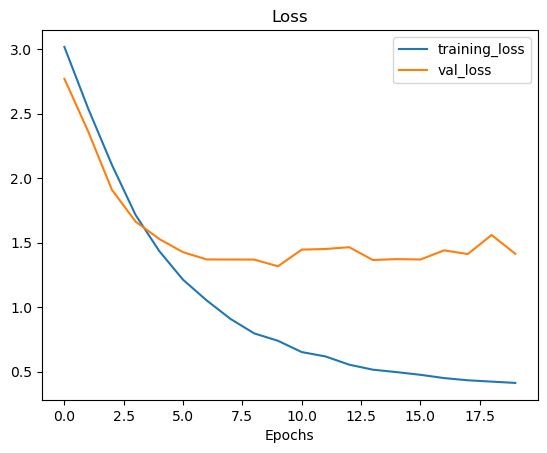

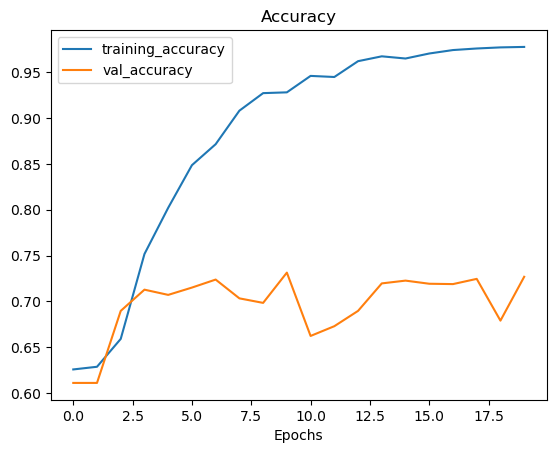

In [ ]:
plot_loss_curves(model_history)
plt.show()

In [ ]:
# Make predictions on the validation data

model_pred_probs = model.predict(x_test)
model_pred_probs.shape, model_pred_probs[:10]

193/193 [==============================] - 6s 28ms/step


((6148, 3),
 array([[9.5161736e-01, 4.4922251e-02, 3.4604445e-03],
        [9.8470980e-01, 1.4560917e-02, 7.2928943e-04],
        [9.9877018e-01, 9.2812022e-04, 3.0164589e-04],
        [9.9894828e-01, 7.2591181e-04, 3.2583269e-04],
        [1.0444568e-05, 9.9785322e-01, 2.1362891e-03],
        [9.9796212e-01, 1.2989088e-03, 7.3898089e-04],
        [9.9958771e-01, 3.1486689e-04, 9.7497134e-05],
        [9.9949288e-01, 4.0105308e-04, 1.0607834e-04],
        [9.9967372e-01, 2.2807397e-04, 9.8142802e-05],
        [9.9977797e-01, 1.5285247e-04, 6.9076414e-05]], dtype=float32))

In [ ]:
# Convert prediction probabilities to prediction classes

model_preds = tf.squeeze(tf.round(model_pred_probs))
model_preds[:10]

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)>

In [ ]:
# Calcuate model results

model_results = calculate_results(y_true=y_test, y_pred=model_preds)
model_results

{'accuracy': 75.84580351333767,
 'precision': 0.7680405919183045,
 'recall': 0.7584580351333767,
 'f1': 0.7599087192795517}